In [9]:
import pandas as pd

df = pd.read_csv('../part1/data.csv')
df = df.dropna(subset=['value'])
df = df.drop(["Unnamed: 0"], axis=1)
df.columns = ['YEAR', 'MONTH', 'DAY','City','Type','Value']

In [10]:
df_w = pd.read_csv('../Data/average_daily_weather.csv')

In [11]:
merged_df = pd.merge(df, df_w, on=['YEAR','MONTH','DAY','City'], how='inner')
merged_df = merged_df.drop(["Humidity"], axis=1)
merged_df = merged_df.dropna()

In [12]:
PM10 = merged_df[merged_df['Type']=='PM10']
PM2_5 = merged_df[merged_df['Type']=='PM2,5']

In [13]:
city_dict = {city: i+1 for i, city in enumerate(PM10['City'].unique())}
PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)
PM2_5.loc[:, 'City'] = PM2_5['City'].replace(city_dict)

/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_3363/563031129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)
/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_3363/563031129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM2_5.loc[:, 'City'] = PM2_5['City'].replace(city_dict)


In [14]:
def two_degree(PM10_value):
    if PM10_value >= 50:
        return -1
    else:
        return 1
    
def six_degree(PM10_value):
    if PM10_value > 150:
        return -3
    elif PM10_value > 110:
        return -2
    elif PM10_value > 80:
        return -1
    elif PM10_value > 50:
        return 1
    elif PM10_value > 20:
        return 2
    else:
        return 3

In [15]:
PM10["Value_two_degree"] = PM10.Value.apply(two_degree)
PM10["Value_six_degree"] = PM10.Value.apply(six_degree)
PM10

/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_3363/2432066310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM10["Value_two_degree"] = PM10.Value.apply(two_degree)
/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_3363/2432066310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM10["Value_six_degree"] = PM10.Value.apply(six_degree)


,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind,Value_two_degree,Value_six_degree
0,2019,1,8,1,PM10,52.78,-2.6,3.0,-1,1
2,2019,1,9,1,PM10,43.53,-3.1,0.0,1,2
4,2019,1,10,1,PM10,46.63,-6.8,2.5,1,2
6,2019,1,11,1,PM10,53.70,-7.1,0.0,-1,1
8,2019,1,12,1,PM10,25.76,0.9,2.7,1,2
...,...,...,...,...,...,...,...,...,...,...
24405,2021,12,25,5,PM10,28.00,-4.1,0.0,1,2
24407,2021,12,28,5,PM10,42.30,-4.7,2.9,1,2
24409,2021,12,29,5,PM10,45.60,-0.7,0.0,1,2
24411,2021,12,30,5,PM10,15.70,4.6,4.6,1,3


In [16]:
PM10_train = PM10[PM10['YEAR']<=2018]
PM10_test = PM10[PM10['YEAR']==2019]

357


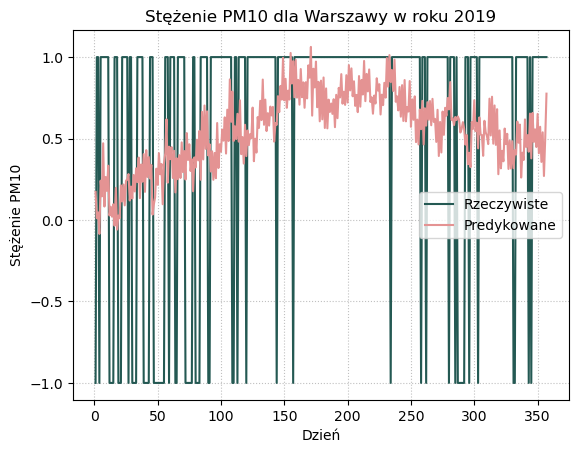

In [17]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

PM10_train_War=PM10_train.loc[PM10_train['City'] == 1]
PM10_test_War=PM10_test.loc[PM10_test['City'] == 1]
print(len(PM10_test_War))

x_train = PM10_train_War[['Temperature', 'Wind', 'YEAR', 'MONTH']]
x_test = PM10_test_War[['Temperature', 'Wind', 'YEAR', 'MONTH']]
y_train = PM10_train_War[['Value_two_degree']]
y_test = PM10_test_War[['Value_two_degree']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(np.arange(1,358,1), y_test, label='Rzeczywiste', color='#245953')
plt.plot(np.arange(1,358,1), y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Warszawy w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [18]:
PM10_train = PM10[PM10['YEAR']<=2018]
PM10_test = PM10[PM10['YEAR']==2019]
PM2_5_train = PM2_5[PM2_5['YEAR']<=2018]
PM2_5_test = PM2_5[PM2_5['YEAR']==2019]

In [19]:
PM10_tr

NameError: name 'PM10_tr' is not defined

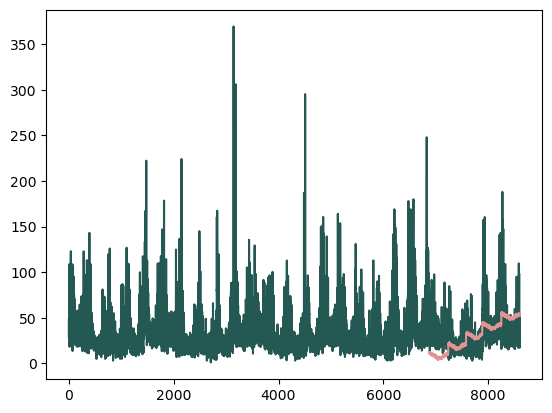

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x_train = PM10_train[['Temperature', 'Wind', 'City']]
x_test = PM10_test[['Temperature', 'Wind', 'City']]
y_train = PM10_train[['Value']]
y_test = PM10_test[['Value']]
model = sm.OLS(np.asarray(y_train), np.asarray(x_train))
results = model.fit()
#print(results.predict(x_test))
end = len(y_train)+1
plt.plot(list(np.arange(1, end)), y_train, color='#245953')
end2 = len(y_train)+2+len(y_test)
plt.plot(list(np.arange(end+1, end2)), y_test, color='#245953')
plt.plot(list(np.arange(len(y_train)+2, len(y_train)+2+len(y_test))), results.predict(x_test), color='#E49393')
#print(results.summary())

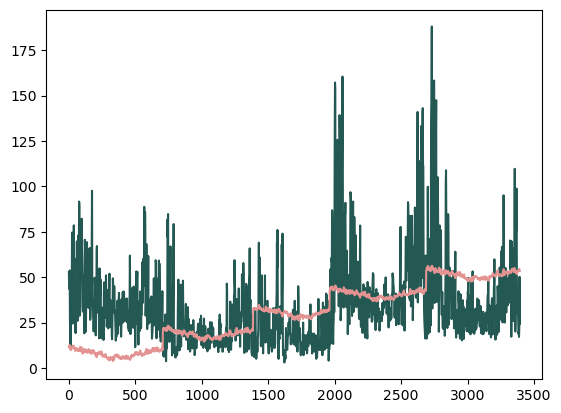

In [ ]:
plt.plot(y_test, color='#245953')
plt.plot(results.predict(x_test), color='#E49393')

sm.OLS (ang. ordinary least squares) to funkcja biblioteki statsmodels w języku Python, służąca do wykonywania prostych modeli regresji liniowej, czyli szuka liniowej zależności między zmiennymi objaśniającymi (independent variable) a zmienną zależną (dependent variable).

Funkcja sm.OLS umożliwia dopasowanie modelu liniowego do danych i oszacowanie wartości współczynników regresji, takich jak nachylenie i wyraz wolny prostej regresji. Można także obliczyć różne miary jakości dopasowania modelu, takie jak R-kwadrat i błąd standardowy.

## Warszawa

357


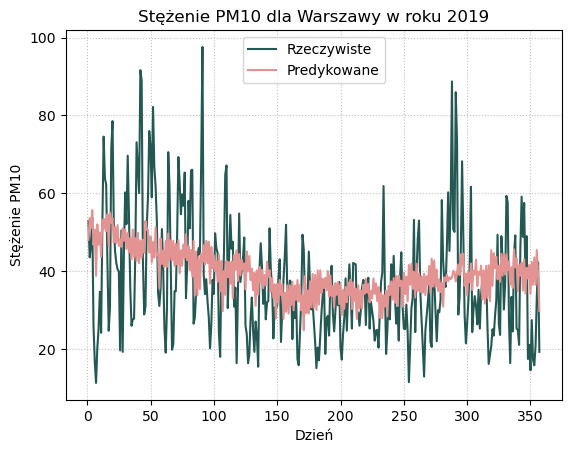

In [ ]:
PM10_train_War=PM10_train.loc[PM10_train['City'] == 1]
PM10_test_War=PM10_test.loc[PM10_test['City'] == 1]
print(len(PM10_test_War))

x_train = PM10_train_War[['Temperature', 'Wind', 'YEAR', 'MONTH']]
x_test = PM10_test_War[['Temperature', 'Wind', 'YEAR', 'MONTH']]
y_train = PM10_train_War[['Value']]
y_test = PM10_test_War[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(np.arange(1,358,1), y_test, label='Rzeczywiste', color='#245953')
plt.plot(np.arange(1,358,1), y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Warszawy w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [ ]:
y_test_2 = []
for i in y_test['Value']:
    y_test_2.append(two_degree(float(i)))
y_pred_2 = []
for i in list(y_pred):
    y_pred_2.append(two_degree(float(i)))

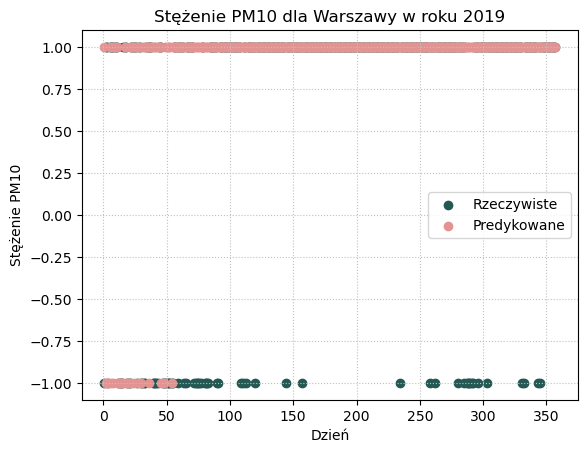

In [ ]:
plt.scatter(np.arange(1,358,1), y_test_2, label='Rzeczywiste', color='#245953')
plt.scatter(np.arange(1,358,1), y_pred_2, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Warszawy w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Testing data')
print(classification_report(y_test_2, y_pred_2))
print(confusion_matrix(y_test_2, y_pred_2))

Testing data
              precision    recall  f1-score   support

          -1       0.50      0.17      0.25        66
           1       0.84      0.96      0.89       291

    accuracy                           0.82       357
   macro avg       0.67      0.56      0.57       357
weighted avg       0.77      0.82      0.78       357

[[ 11  55]
 [ 11 280]]


In [ ]:
y_pred=results.predict(x_train)

In [ ]:
y_test_2 = []
for i in y_test['Value']:
    y_test_2.append(six_degree(float(i)))
y_pred_2 = []
for i in list(y_pred):
    y_pred_2.append(six_degree(float(i)))
len(y_test_2)

357

In [ ]:
print('Testing data')
print(classification_report(y_test_2, y_pred_2))
print(confusion_matrix(y_test_2, y_pred_2))

Testing data
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         6
           1       0.50      0.18      0.27        60
           2       0.75      0.97      0.85       261
           3       0.00      0.00      0.00        30

    accuracy                           0.74       357
   macro avg       0.31      0.29      0.28       357
weighted avg       0.63      0.74      0.66       357

[[  0   0   6   0]
 [  0  11  49   0]
 [  0   9 252   0]
 [  0   2  28   0]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              1469.
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:37:31   Log-Likelihood:                         -6140.8
No. Observations:                1396   AIC:                                  1.229e+04
Df Residuals:                    1392   BIC:                                  1.231e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 216.02870454745005
MSE sqrt: 14.697914972792912
MAE: 11.624258040537967
R2: 0.09025254614554468


## Wrocław

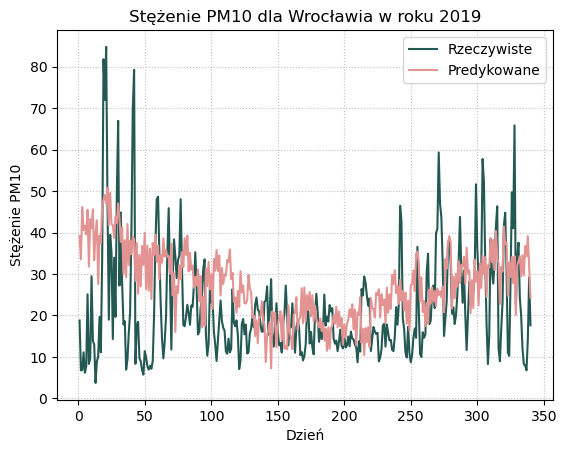

In [ ]:
PM10_train_Wro=PM10_train.loc[PM10_train['City'] == 2]
PM10_test_Wro=PM10_test.loc[PM10_test['City'] == 2]

x_train = PM10_train_Wro[['Temperature', 'Wind', 'YEAR', 'MONTH']]
x_test = PM10_test_Wro[['Temperature', 'Wind', 'YEAR', 'MONTH']]
y_train = PM10_train_Wro[['Value']]
y_test = PM10_test_Wro[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(np.arange(1,len(y_test)+1,1), y_test, label='Rzeczywiste', color='#245953')
plt.plot(np.arange(1,len(y_test)+1,1), y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Wrocławia w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              1098.
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:37:32   Log-Likelihood:                         -5805.2
No. Observations:                1371   AIC:                                  1.162e+04
Df Residuals:                    1367   BIC:                                  1.164e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 210.9897031748729
MSE sqrt: 14.52548461067213
MAE: 11.524264755482118
R2: -0.24594145218699892


## Gdańsk

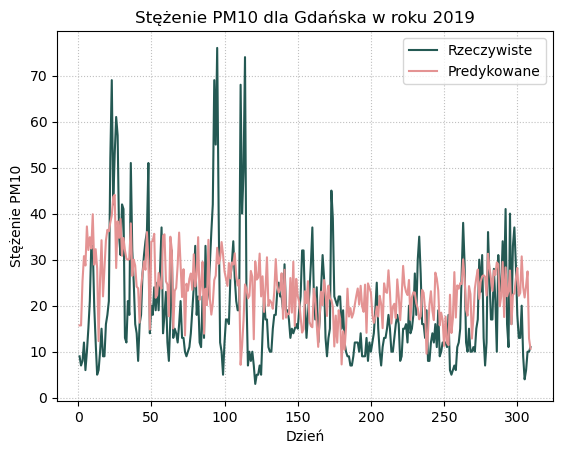

In [ ]:
PM10_train_Gda=PM10_train.loc[PM10_train['City'] == 3]
PM10_test_Gda=PM10_test.loc[PM10_test['City'] == 3]

x_train = PM10_train_Gda[['Temperature', 'Wind', 'YEAR', 'MONTH']]
x_test = PM10_test_Gda[['Temperature', 'Wind', 'YEAR', 'MONTH']]
y_train = PM10_train_Gda[['Value']]
y_test = PM10_test_Gda[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(np.arange(1,len(y_test)+1,1), y_test, label='Rzeczywiste', color='#245953')
plt.plot(np.arange(1,len(y_test)+1,1), y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Gdańska w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              1086.
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        15:44:41   Log-Likelihood:                         -5668.0
No. Observations:                1385   AIC:                                  1.134e+04
Df Residuals:                    1381   BIC:                                  1.136e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 168.2682402737573
MSE sqrt: 12.971824862900258
MAE: 10.23830502981376
R2: -0.0970538768416529


## Kraków

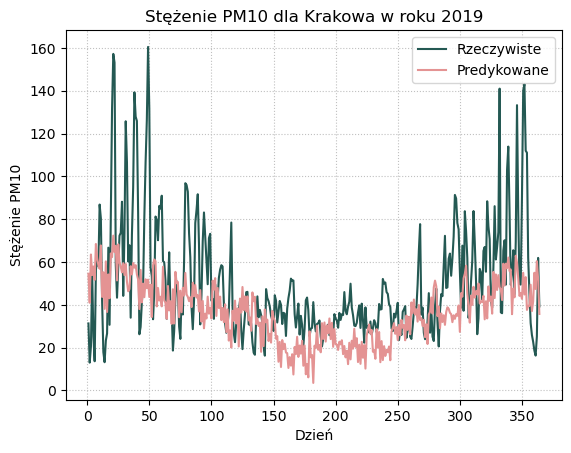

In [ ]:
PM10_train_Kra=PM10_train.loc[PM10_train['City'] == 4]
PM10_test_Kra=PM10_test.loc[PM10_test['City'] == 4]

x_train = PM10_train_Kra[['Temperature', 'Wind', 'YEAR', 'MONTH']]
x_test = PM10_test_Kra[['Temperature', 'Wind', 'YEAR', 'MONTH']]
y_train = PM10_train_Kra[['Value']]
y_test = PM10_test_Kra[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(np.arange(1,len(y_test)+1,1), y_test, label='Rzeczywiste', color='#245953')
plt.plot(np.arange(1,len(y_test)+1,1), y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Krakowa w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              987.4
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        16:01:36   Log-Likelihood:                         -6290.7
No. Observations:                1374   AIC:                                  1.259e+04
Df Residuals:                    1370   BIC:                                  1.261e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 733.2602799700134
MSE sqrt: 27.07877914474752
MAE: 19.59774940919759
R2: -0.01081827434813798


## Katowice

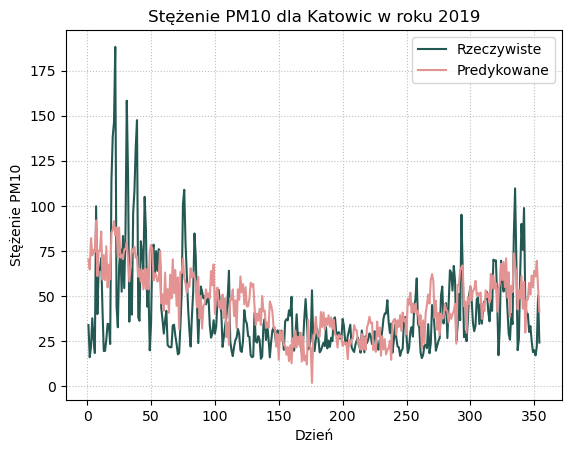

In [ ]:
PM10_train_Kat=PM10_train.loc[PM10_train['City'] == 5]
PM10_test_Kat=PM10_test.loc[PM10_test['City'] == 5]

x_train = PM10_train_Kat[['Temperature', 'Wind', 'YEAR', 'MONTH']]
x_test = PM10_test_Kat[['Temperature', 'Wind', 'YEAR', 'MONTH']]
y_train = PM10_train_Kat[['Value']]
y_test = PM10_test_Kat[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(np.arange(1,len(y_test)+1,1), y_test, label='Rzeczywiste', color='#245953')
plt.plot(np.arange(1,len(y_test)+1,1), y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Katowic w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              1089.
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        16:06:39   Log-Likelihood:                         -6451.1
No. Observations:                1352   AIC:                                  1.291e+04
Df Residuals:                    1348   BIC:                                  1.293e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 514.6386174227781
MSE sqrt: 22.6856478290301
MAE: 17.087646823369244
R2: 0.16405204672987816
